# Science Case 5:   NGC3504 

The galaxy NGC3504 has been observed in two unrelated ALMA projects, both in band 6 at at 230 GHz

1. **2016.1.00650.S** - one 7m and two 12m observations of just NGC3504, to study flow in a bar
2. **2017.1.00964.S** - a collection of 7 galaxies with the purpose of measure gas flow near the central black hole. For NGC3504 two datasets were collected.

Here we are focusing on the commonalities and differences between these two observations.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 

###  astroquery.alma

First we should query the science archive, we can do https://almascience.nrao.edu/aq/ as well, but we want also show this via the notebook. 


In [2]:
from astroquery.alma import Alma
import pandas as pd

# more to come here.  here we just want to show how much you can do with the current query, before science
# showcase alminer ?
alma = Alma()

In [3]:
n = Alma.query_object('NGC3504')

In [4]:
print(pd.unique(n['proposal_id']))
print(pd.unique(n['obs_id']))

[b'2017.1.00964.S' b'2016.1.00650.S']
[b'uid://A001/X1288/Xba6' b'uid://A001/X1288/Xba8' b'uid://A001/X87a/X70a'
 b'uid://A001/X87a/X708' b'uid://A001/X87a/X706']


Thus we have indeed two projects,and five observations

In [5]:
ci=['obs_id','s_fov','s_resolution']
n['nres'] = 3600*n['s_fov']/n['s_resolution']
print(n[ci])

        obs_id               s_fov             s_resolution    
                              deg                  deg         
--------------------- -------------------- --------------------
uid://A001/X1288/Xba6 0.006863718695429476 0.034121085407438106
uid://A001/X1288/Xba6 0.006863718695429476 0.034121085407438106
uid://A001/X1288/Xba6 0.006863718695429476 0.034121085407438106
uid://A001/X1288/Xba6 0.006863718695429476 0.034121085407438106
uid://A001/X1288/Xba8  0.00686371854646795  0.20065563262611036
uid://A001/X1288/Xba8  0.00686371854646795  0.20065563262611036
uid://A001/X1288/Xba8  0.00686371854646795  0.20065563262611036
uid://A001/X1288/Xba8  0.00686371854646795  0.20065563262611036
 uid://A001/X87a/X70a 0.017853666133604822    5.503583966319726
 uid://A001/X87a/X70a 0.017853666133604822    5.503583966319726
 uid://A001/X87a/X70a 0.017853666133604822    5.503583966319726
 uid://A001/X87a/X70a 0.017853666133604822    5.503583966319726
 uid://A001/X87a/X708  0.013051286737352

Notice there appears to be a units issue with s_resolution: they appear to be in arcsec. There is also a 'spatial_resolution', but it has the same issue.



### astroquery.admit

In [6]:
from astroquery.admit import ADMIT
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',25)


a = ADMIT('../admit.db')
a.check()

Found  ../admit.db
Checking db.... 0
70 70 70
header    : 103 entries
alma      : 103 entries
win       : 103 entries
lines     : 26 entries
sources   : 268 entries


# Continuum

First we want to see if any continuum is detected, so we select all windows with one channel.



In [7]:
source = 'NGC3504'
p = a.query(source_name_alma=source,nchan=1,flux='>0')
print(p.shape)

kwargs  {'source_name_alma': 'NGC3504', 'nchan': 1, 'flux': '>0'}
select * from alma inner join win on (win.a_id = alma.id)  inner join sources on (sources.w_id = win.id)   WHERE alma.target_name='NGC3504' AND win.nchan=1 AND sources.flux>=0.0 AND sources.l_id = 0 
(21, 38)


In [8]:
a.key_description.show_in_notebook(display_length=20)

idx,Keyword,Description,Database Table
0,alma_id,ALMA ID,Window
1,win_id,Spectral window ID,Window
2,spw,Spectral window name,Window
3,nlines,Number of lines,Window
4,nsources,Number of sources,Window
5,nchan,Number of channels,Window
6,win_peak,Window peak flux,Window
7,win_rms,Window RMS noise,Window
8,win_snr,Window Signal to noise ratio (peak/rms),Window
9,bmaj,Beam major axis,Window


We collect a few observables: observing time, as well as peak and flux and the resolution

Note we need to clean up the units

In [9]:
ci=['obs_id','spw','nsources','t_min', 'flux', 'peak_s','fop','bmaj_arcsec','smaj']
p['fop'] = p['flux']/p['peak_s']
p['bmaj_arcsec'] = p['bmaj'] * 3600
print(p[ci])

                   obs_id    spw  nsources         t_min     flux    peak_s  \
0   uid://A001/X1288/Xba6  spw21         1  58050.543677  0.00086  0.000151   
1   uid://A001/X1288/Xba8  spw19         1  58119.297186  0.00111  0.000512   
2   uid://A001/X1288/Xba8  spw21         1  58119.297186  0.00124  0.000580   
3   uid://A001/X1288/Xba8  spw23         1  58119.297186  0.00179  0.000594   
4   uid://A001/X1288/Xba8  spw25         1  58119.297186  0.00145  0.000706   
5    uid://A001/X87a/X706    ???         1  57713.452563  0.00173  0.001090   
6    uid://A001/X87a/X706    ???         1  57713.452563  0.00151  0.000968   
7    uid://A001/X87a/X706    ???         1  57713.452563  0.00156  0.001020   
8    uid://A001/X87a/X706    ???         1  57713.452563  0.00173  0.001260   
9    uid://A001/X87a/X708    ???         3  57830.136178  0.00770  0.002080   
10   uid://A001/X87a/X708    ???         3  57830.136178  0.01380  0.002040   
11   uid://A001/X87a/X708    ???         3  57830.13

It's a little surprising that flux/peak is 1.5  for the lowest and highest resolution array data, but there clearly is something very odd about the middle resolution (X708) data.

NOTE:  the ??? spw is some bug where something failed.   to be fixed

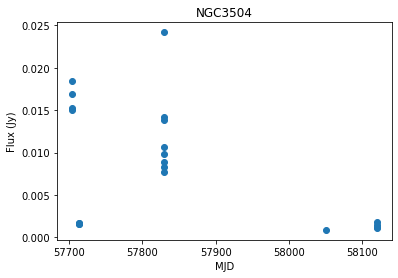

In [10]:
plt.scatter(p['t_min'],p['flux']);
plt.title(source)
plt.xlabel('MJD')
plt.ylabel('Flux (Jy)');

well, the fluxes are somewhat all over the place..... averaging around 15 mJy.

The other dataset of NGC3504 at mjd > 58000 seems to have lost a lot of flux.

# Spectral Lines

In [11]:
p = a.query(source_name_alma=source,nchan='>1',mom0flux='>0')

kwargs  {'source_name_alma': 'NGC3504', 'nchan': '>1', 'mom0flux': '>0'}
select * from alma inner join win on (win.a_id = alma.id)  inner join lines on (lines.w_id = win.id )  WHERE alma.target_name='NGC3504' AND win.nchan>=1.0 AND lines.mom0flux>=0.0


In [12]:
print(p.shape)
print(p.columns)



(8, 37)
Index(['id', 'obs_id', 'target_name', 's_ra', 's_dec', 'frequency', 't_min',
       'project_abstract', 'obs_title', 'science_keyword',
       'scientific_category', 'proposal_authors', 'id', 'a_id', 'spw', 'freqc',
       'freqw', 'vlsr', 'nlines', 'nsources', 'nchan', 'peak_w', 'rms_w',
       'bmaj', 'bmin', 'bpa', 'fcoverage', 'id', 'w_id', 'formula',
       'transition', 'restfreq', 'vmin', 'vmax', 'mom0flux', 'mom1peak',
       'mom2peak'],
      dtype='object')


In [13]:
ci=['obs_id','spw','frequency','formula','mom0flux','mom1peak','mom2peak']
print(p[ci])

                  obs_id    spw   frequency formula    mom0flux  mom1peak  \
0  uid://A001/X1288/Xba6  spw23  243.760018      CS   3429.8800   1831.72   
1  uid://A001/X1288/Xba8  spw23  243.760022      CS   1090.5600   1549.75   
2   uid://A001/X87a/X706    ???  229.366802      CO  24782.4000   1548.35   
3   uid://A001/X87a/X706    ???  243.689957      CS    140.5190   1483.46   
4   uid://A001/X87a/X708    ???  229.366820      CO  32461.2000   1539.72   
5   uid://A001/X87a/X708    ???  243.690784      CS    107.7540   1538.80   
6   uid://A001/X87a/X70a  spw16  229.366824      CO  26393.2000   1537.47   
7   uid://A001/X87a/X70a  spw20  243.689992      CS     91.1055   1544.31   

   mom2peak  
0   33.6674  
1   80.4934  
2   60.9915  
3   15.8738  
4   59.0989  
5   31.0504  
6   40.2249  
7   24.9688  


Clearly the CO line in missing in they survey (Xba6,8), whereas the CS line is there....

to be continued